# Image and Video Preprocessing or Augmentation

In [1]:
from aperturedb import Connector
from aperturedb import NotebookHelpers as nh

# ApertureDB Server Info for establishing connection
db_host  = "aperturedb.local"  # assuming local installation as provided
user     = "admin"             # requires authentication
password = "admin"             # use the password provided for the instance

db = Connector.Connector(db_host, user=user, password=password)

## Simply find an existing image, with a single command
Find commands like [FindImage](https://docs.aperturedata.io/query_language/Reference/image_commands/image_commands/FindImage) can enable fairly complex searches

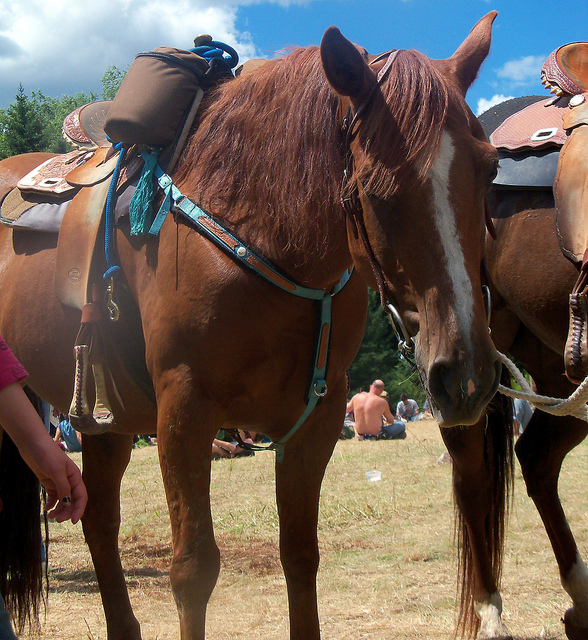

[
    {
        "FindImage": {
            "blobs_start": 0,
            "entities": [
                {
                    "_blob_index": 0,
                    "_uniqueid": "3.117168.3964",
                    "aspect_ratio": 0.91875,
                    "coco_url": "http://images.cocodataset.org/train2017/000000567989.jpg",
                    "corpus": "train",
                    "date_captured": {
                        "_date": "2013-11-18T22:44:59+00:00"
                    },
                    "file_name": "000000567989.jpg",
                    "flickr_url": "http://farm5.staticflickr.com/4095/4781395665_1fbff6af05_z.jpg",
                    "height": 640,
                    "id": 567989,
                    "license": 5,
                    "type": "train",
                    "width": 588,
                    "yfcc_id": 4781395665
                }
            ],
            "returned": 1,
            "status": 0
        }
    }
]


In [2]:
query = [{
    "FindImage": {
        "_ref": 1,
        "constraints": {
            "id": ["==", 567989]
        },
        "results": {
            "all_properties": True
        },
        "blobs": True
    }
}]

response, blobs = db.query(query)

nh.display(blobs)
db.print_last_response()

## Now lets get the same image resized and rotated on the fly
ApertureDB query language currently supports most commonly used [preprocessing operations](https://docs.aperturedata.io/query_language/Reference/shared_command_parameters/operations) on images and videos.

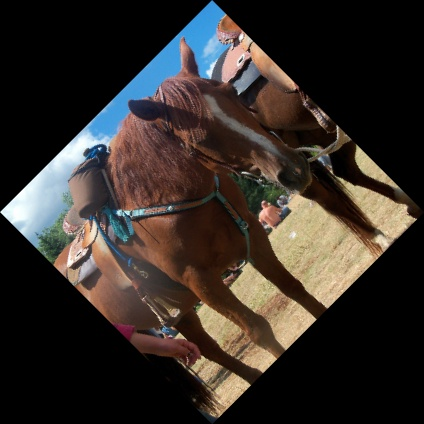

In [3]:
query = [{
    "FindImage": {
        "_ref": 1,
        "constraints": {
            "id": ["==", 567989]
        },
        "operations": [{
            "type": "resize",
            "width": 300,
            "height": 300
        },{
            "type": "rotate",
            "angle": 45,
            "resize": False
        } ],
        "blobs": True
    }
}]

response, blobs = db.query(query)

nh.display(blobs)

## Videos can similarly be pre-processed when adding or searching

In [4]:
query = [{
    "FindVideo": {
        "constraints": {
            "guid": ["==", "cc1c685b1feb6dc27931ce62d78838a6"]
        },
        "blobs": True,
        "results": {
            "list": ["url", "date_captured"]
        }
    }
}]

response, blobs = db.query(query)

print(db.get_last_response_str())
nh.display_video_mp4(blobs[0])

[
    {
        "FindVideo": {
            "blobs_start": 0,
            "entities": [
                {
                    "_blob_index": 0,
                    "date_captured": {
                        "_date": "2023-06-05T08:05:59.608305+00:00"
                    },
                    "url": "https://aperturedata-public.s3.us-west-2.amazonaws.com/sample_videos/cc1c685b1feb6dc27931ce62d78838a6.mp4"
                }
            ],
            "returned": 1,
            "status": 0
        }
    }
]


In [5]:
query = [{
    "FindVideo": {
        "constraints": {
            "guid": ["==", "cc1c685b1feb6dc27931ce62d78838a6"]
        },
        "blobs": True,
        "operations": [{        # Original videos are longer. We just want to sample and prepare them
            "type": "resize",   # performance depends on the video complexity
            "height": 300,
            "width":  300
        },{
            "type": "interval", # Interval Operation, performance depends on the video complexity
            "start": 90,        # Start from 3 sec (30fps * 3)
            "stop": 600,        # Continue for a 10 secs clip
            "step": 5           # Read every 5th frame
        }]
    }
}]

response, blobs = db.query(query)

print(db.get_last_response_str())
nh.display_video_mp4(blobs[0])

[
    {
        "FindVideo": {
            "blobs_start": 0,
            "returned": 1,
            "status": 0
        }
    }
]
